In [1]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Data/Expendatures Teacher Inexperience Out of Cert and Core Index").dropna()

In [3]:
import numpy as np
df['log_PER_FED_STATE_LOCAL_EXP'] = np.log(df['PER_FED_STATE_LOCAL_EXP'])

In [4]:
features = ['log_PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP', 'PER_OUT_CERT', 'ABSENT_RATE']
outcome = "CORE_INDEX"

In [5]:
from sklearn.model_selection import train_test_split
model_df = df[features + [outcome]].copy()
df_train, df_temp = train_test_split(model_df, 
                                     train_size=0.9, 
                                     random_state=500, 
                                     shuffle=True
                                    )

# Split the remaining data into validation and test sets
df_val, df_test = train_test_split(df_temp, 
                                   train_size=0.5,  # Assuming you want half of the remaining data for validation and half for testing
                                   random_state=500, 
                                   shuffle=True
                                  )

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)
scaler.fit(df_train)
scaler.transform(model_df)

array([[-9.40250136e-01, -1.06714350e+00, -6.30152651e-01,
        -1.09065335e+00,  7.84364404e-01],
       [-8.86424273e-01, -7.68175110e-01, -6.30152651e-01,
        -8.29228898e-01, -1.17398377e+00],
       [-2.21780672e+00, -4.69206725e-01, -6.30152651e-01,
         2.90996886e-04, -1.87102294e+00],
       ...,
       [-6.11852459e-01,  4.27698432e-01, -3.13644473e-01,
         2.36578482e-01, -2.01192823e-01],
       [-1.03372818e+00,  3.67904754e-01, -6.30152651e-01,
        -4.72283974e-01, -1.51101370e+00],
       [-6.91057359e-01,  6.07079463e-01, -6.30152651e-01,
        -8.94585011e-01,  2.25201107e-01]])

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25, weights="uniform")
knn.fit(X=df_train[features], 
           y=df_train[outcome])

KNeighborsRegressor(n_neighbors=25)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training set
predictions = knn.predict(df_train[features])

# Calculate evaluation metrics
mae = mean_absolute_error(df_train[outcome], predictions)
mse = mean_squared_error(df_train[outcome], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_train[outcome], predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 23.903506124061636
Mean Squared Error (MSE): 897.7192319589095
Root Mean Squared Error (RMSE): 29.96196308586788
R-squared (R²): 0.41476591285156605


In [41]:
# Make predictions on the training set
predictions = knn.predict(df_val[features])

# Calculate evaluation metrics
mae = mean_absolute_error(df_val[outcome], predictions)
mse = mean_squared_error(df_val[outcome], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(df_val[outcome], predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 24.981437722419926
Mean Squared Error (MSE): 959.1945088683276
Root Mean Squared Error (RMSE): 30.970865484650695
R-squared (R²): 0.41780701344228977


In [42]:
y_train_pred = knn.predict(df_train[features])
y_test_pred = knn.predict(df_test[features])

In [43]:
def clean_label(label):
    return label.replace("_", " ").title()

df_train["pred"] = y_train_pred

In [44]:
# Assuming df_test is your test dataset
predictions_test = knn.predict(df_test[features])

# Create a DataFrame with actual and predicted values for the test set
scatter_df_test = pd.DataFrame({
    'Actual': df_test[outcome],
    'Predicted': predictions_test,
    'log_PER_FED_STATE_LOCAL_EXP': df_test['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_test['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_test['PER_OUT_CERT'],
    'CORE_INDEX': df_test['CORE_INDEX'], 
    'ABSENT_RATE': df_test['ABSENT_RATE']
})

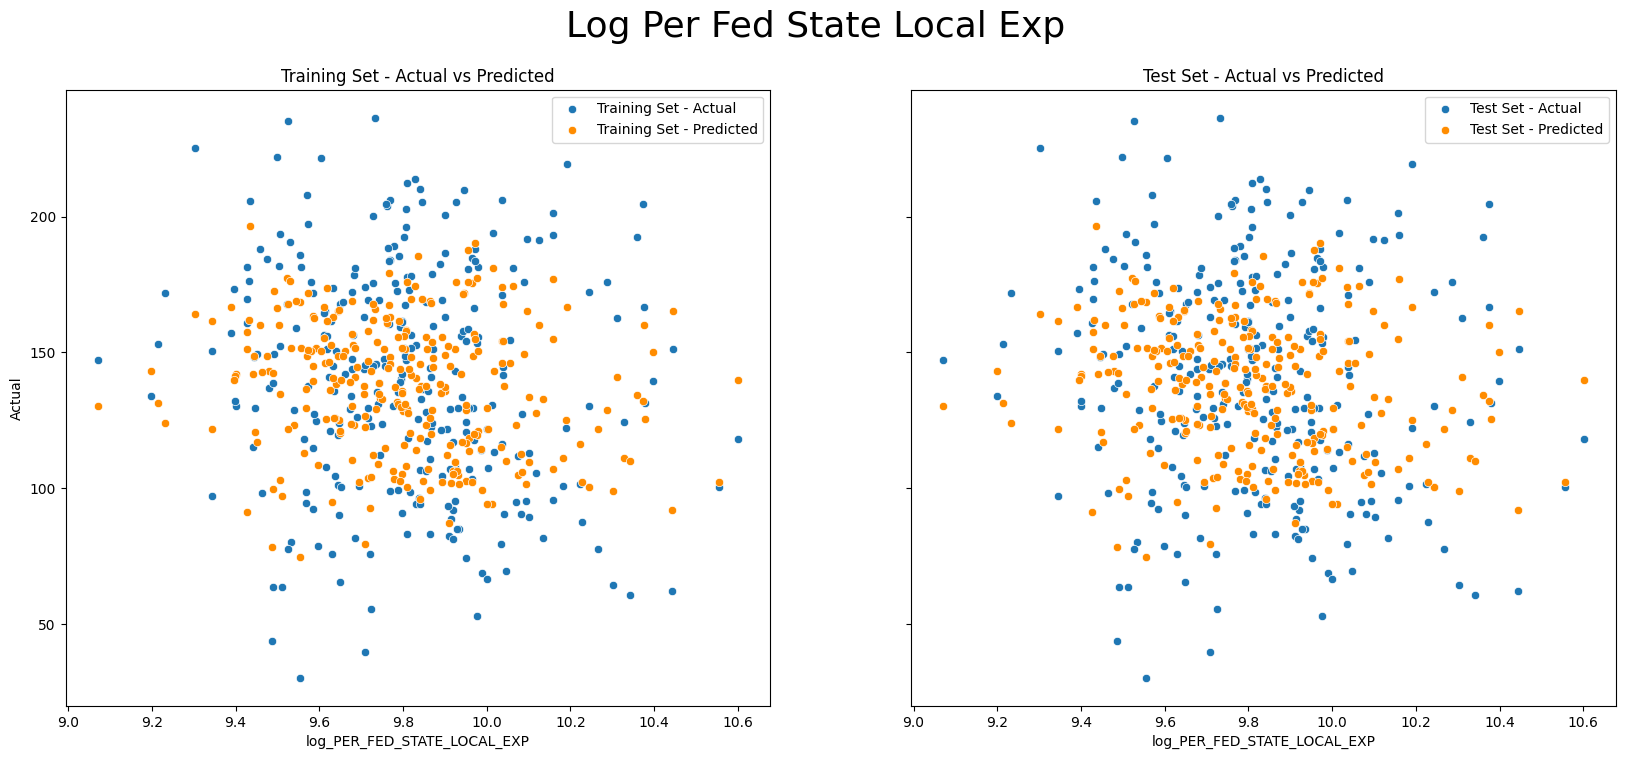

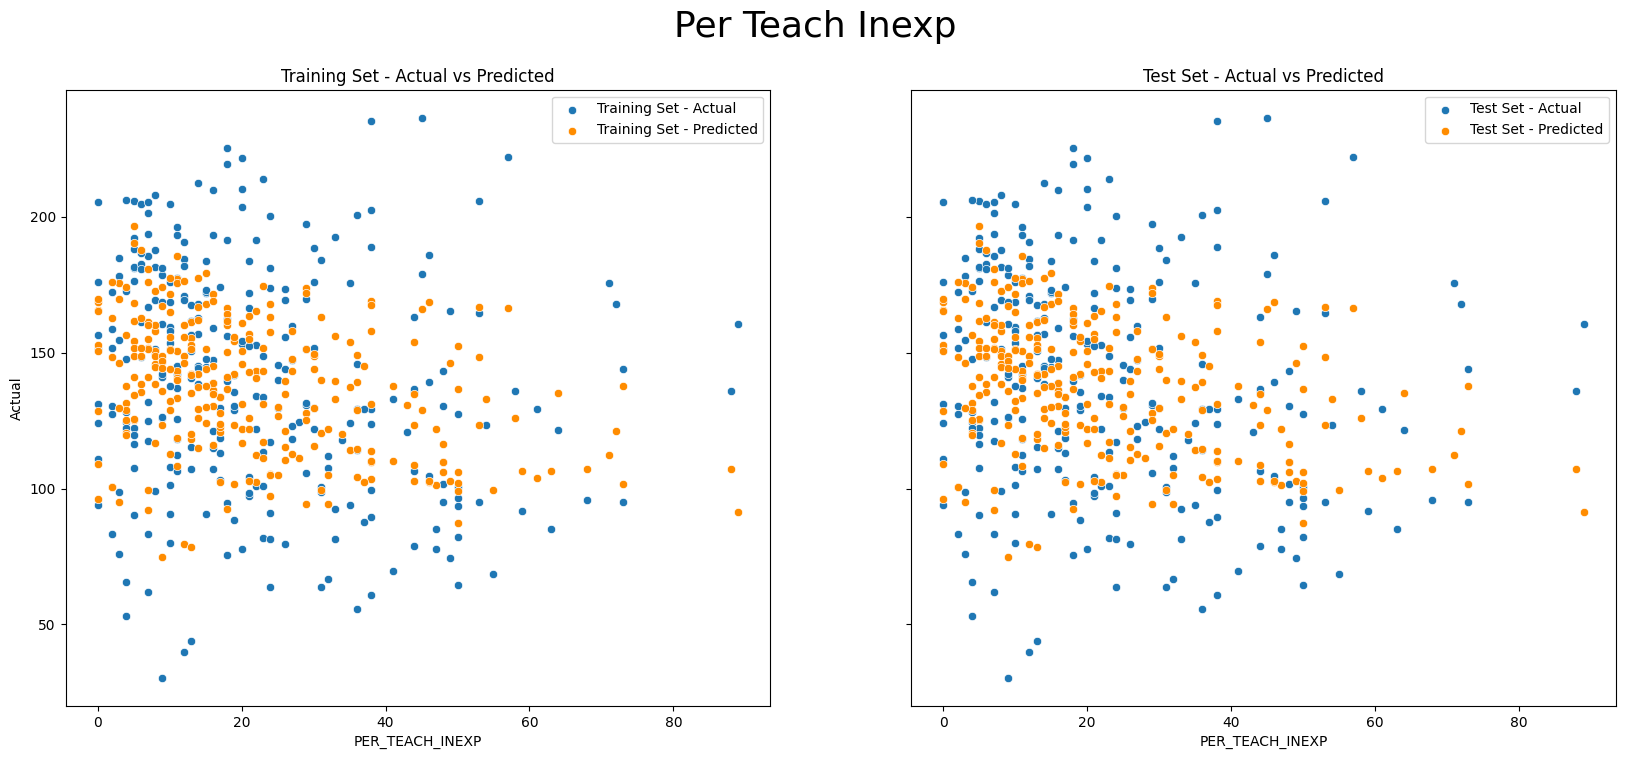

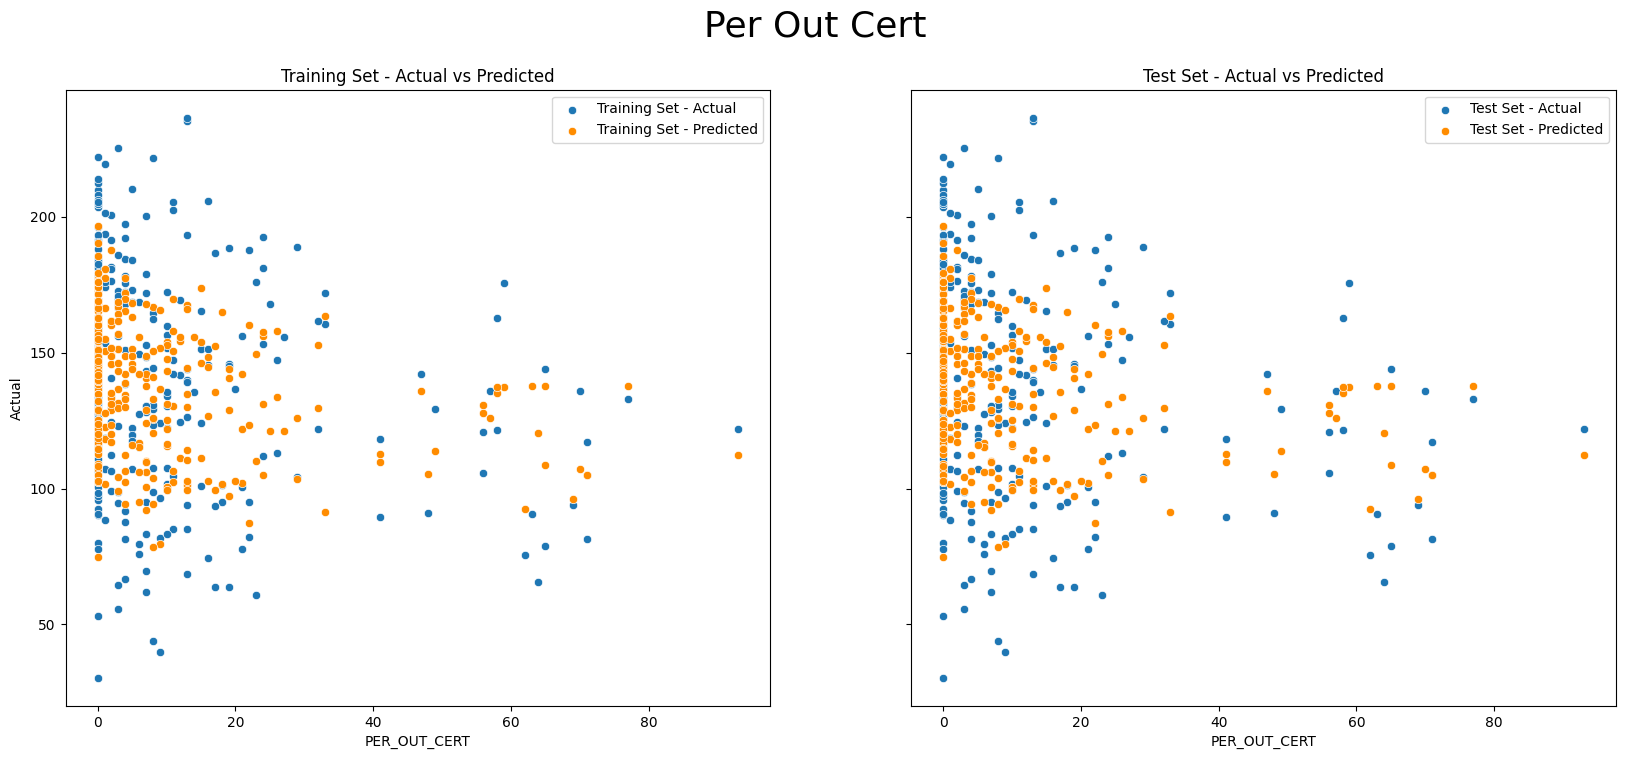

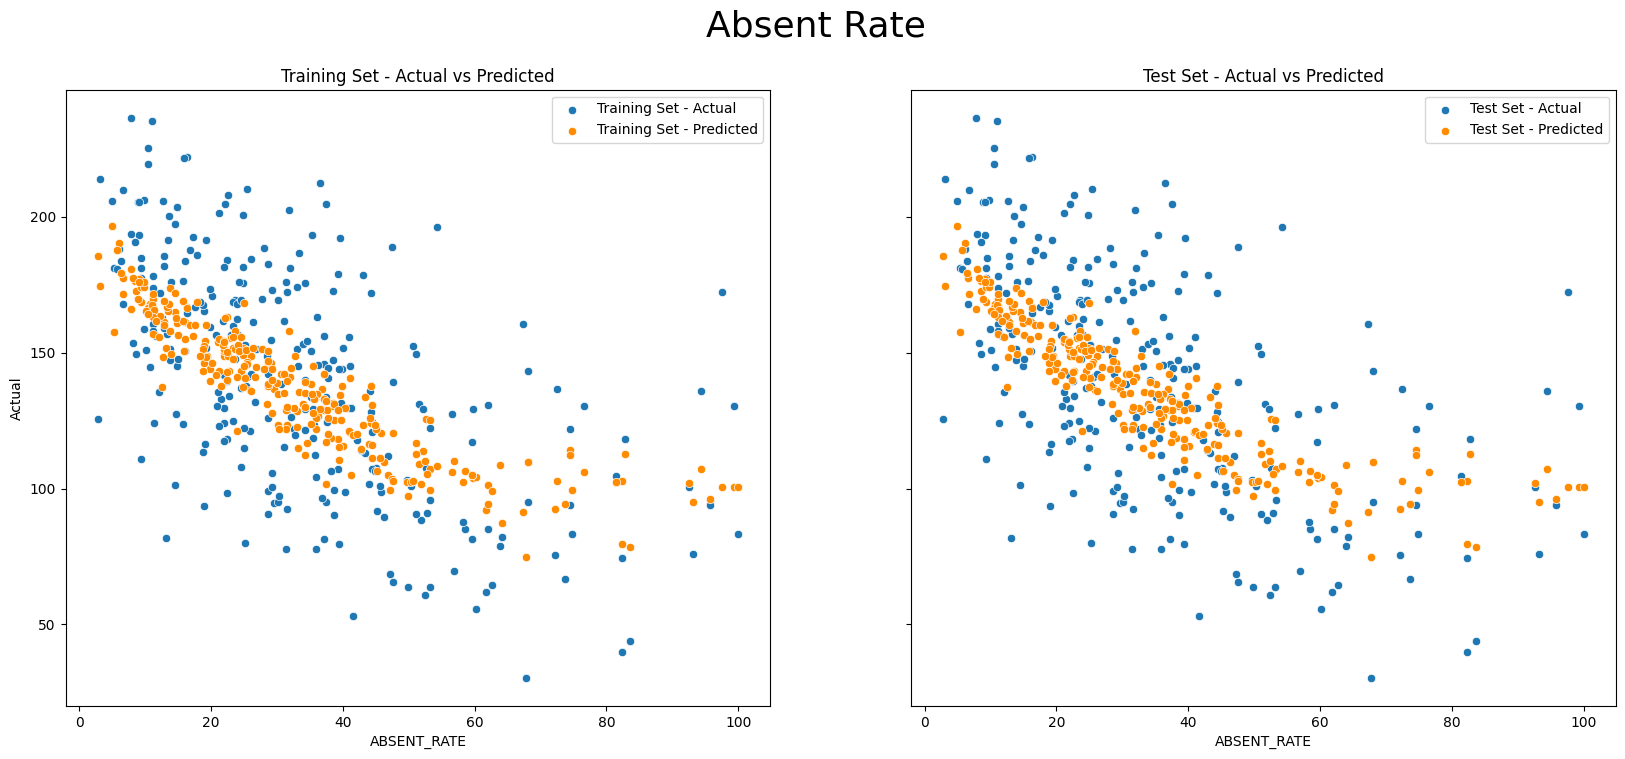

In [45]:
# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()

In [46]:
## Creating a dataframe with predictions in addition to actual outcomes for a scatter plot
scatter_df_top = df_train[features+[outcome]]
scatter_df_top["Source"] = "Actual"

scatter_df_bottom = df_train[features+["pred"]]
scatter_df_bottom["Source"] = "Prediction"
scatter_df_bottom.rename({"pred": outcome}, axis="columns", inplace=True)

## Concatonating
scatter_df = pd.concat([scatter_df_top, scatter_df_bottom])


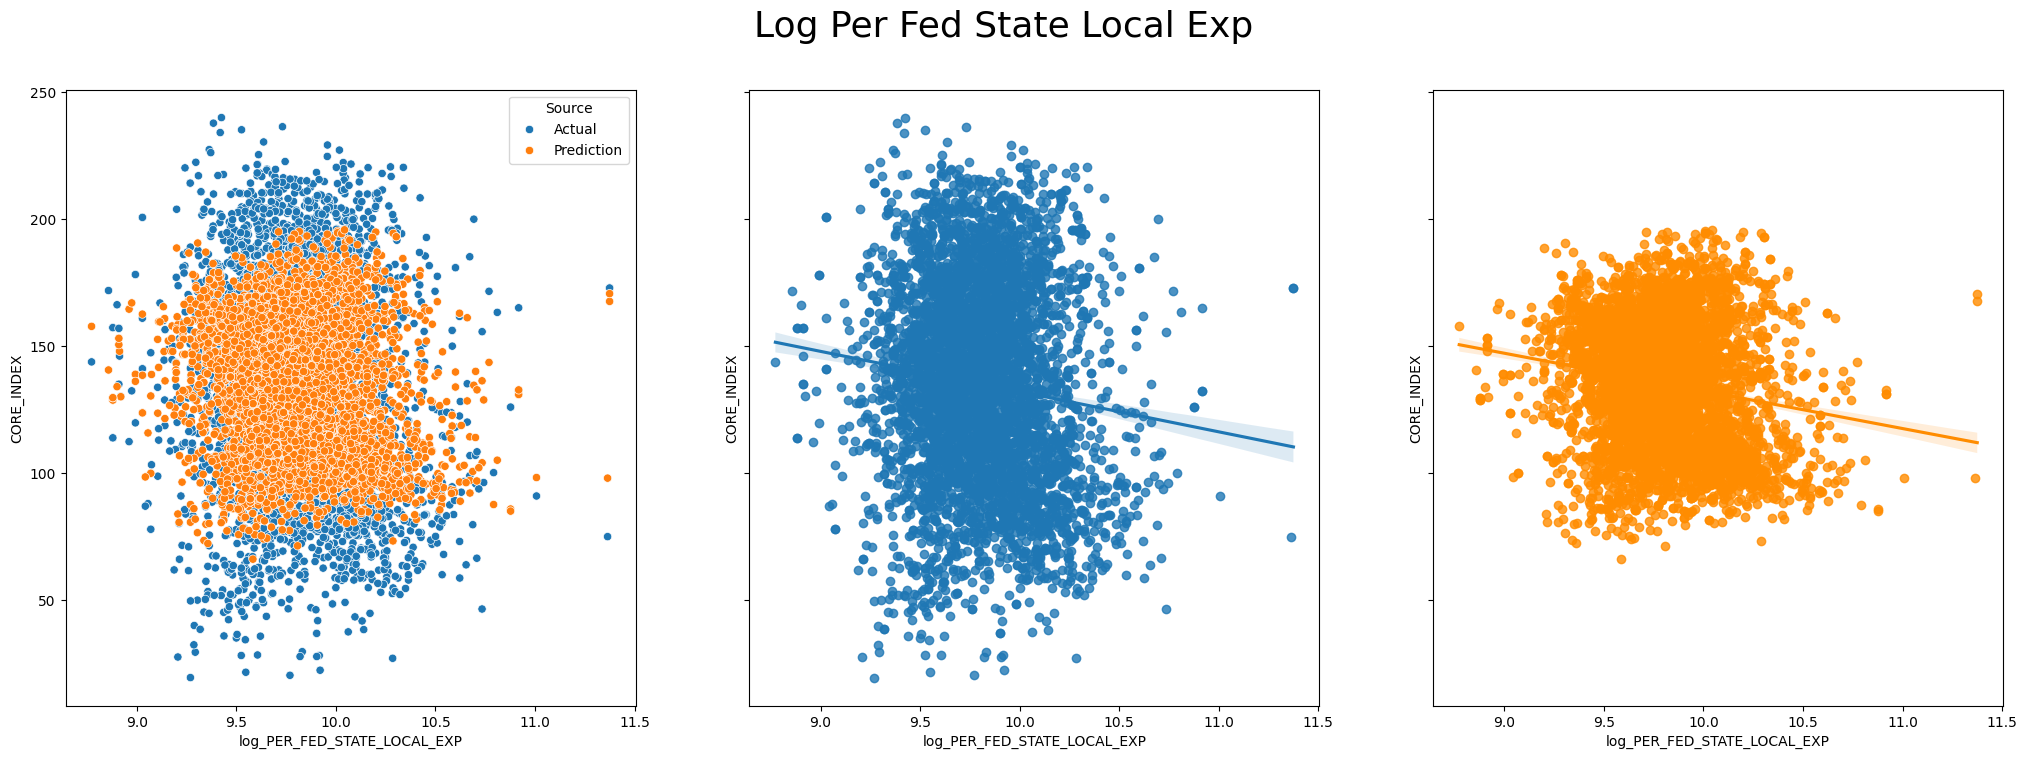

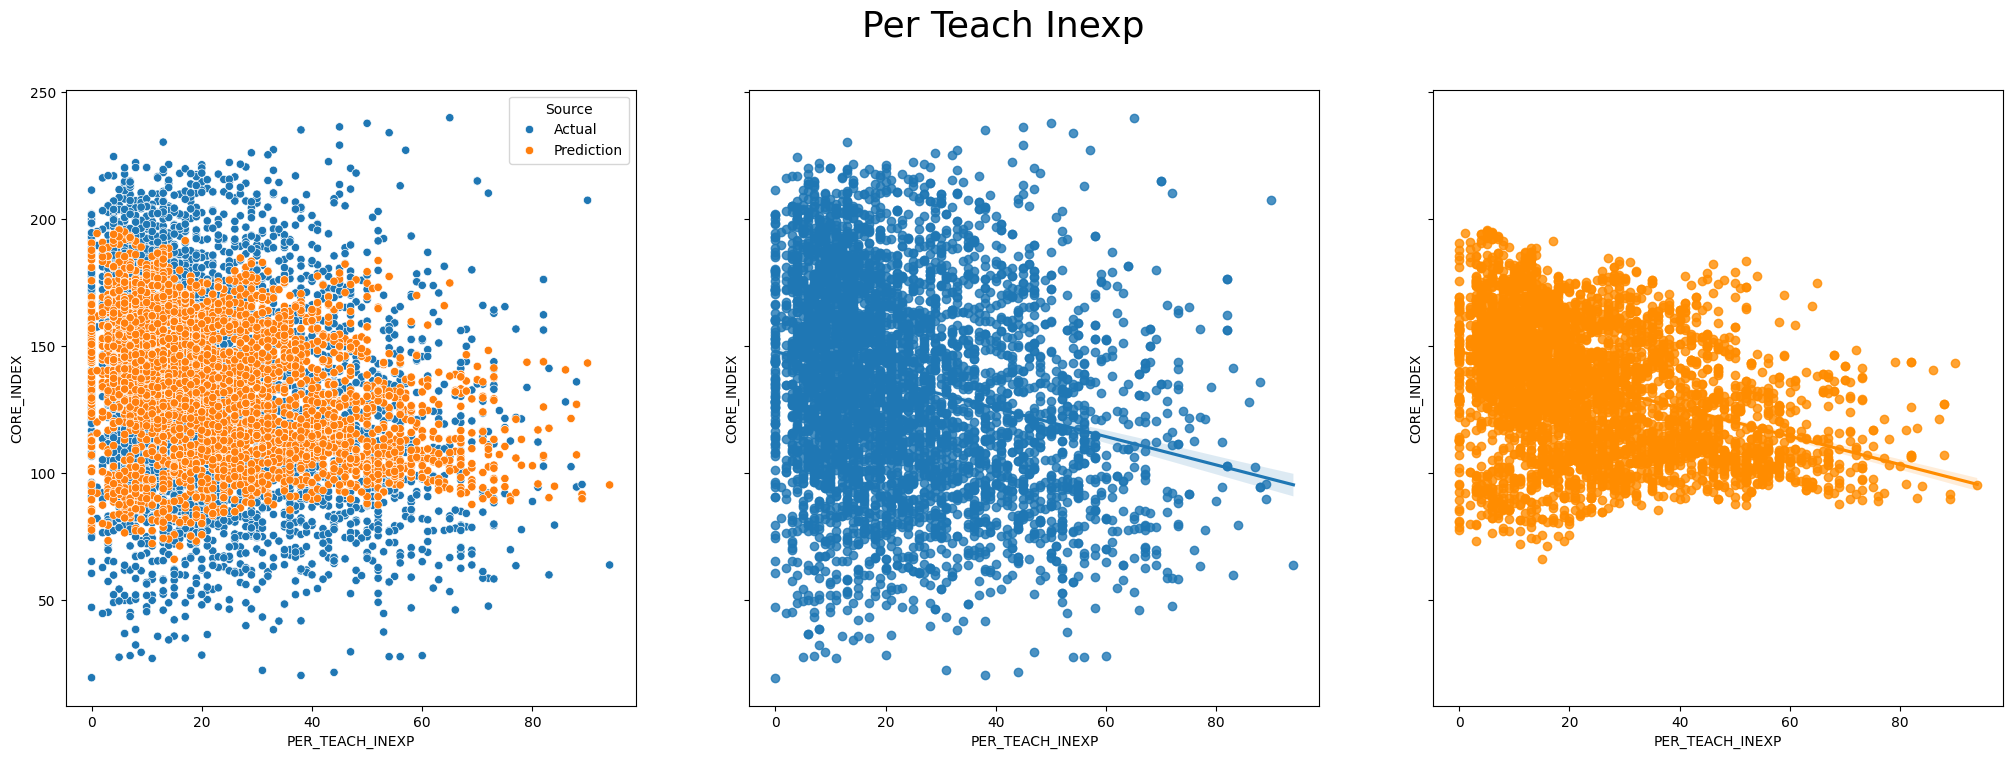

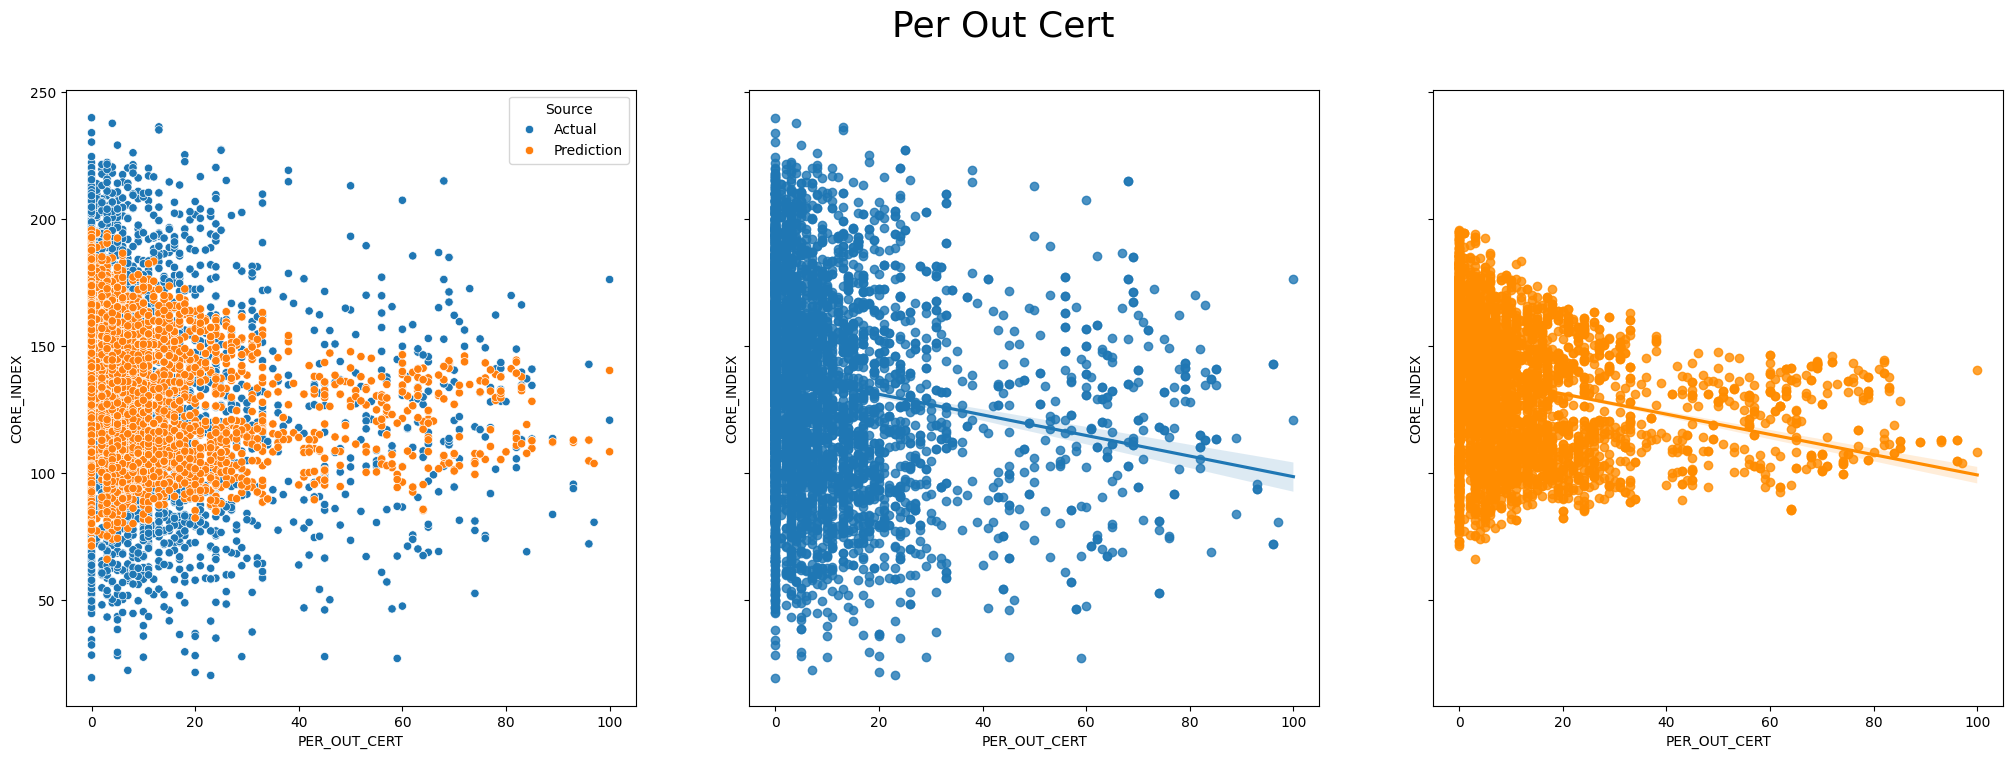

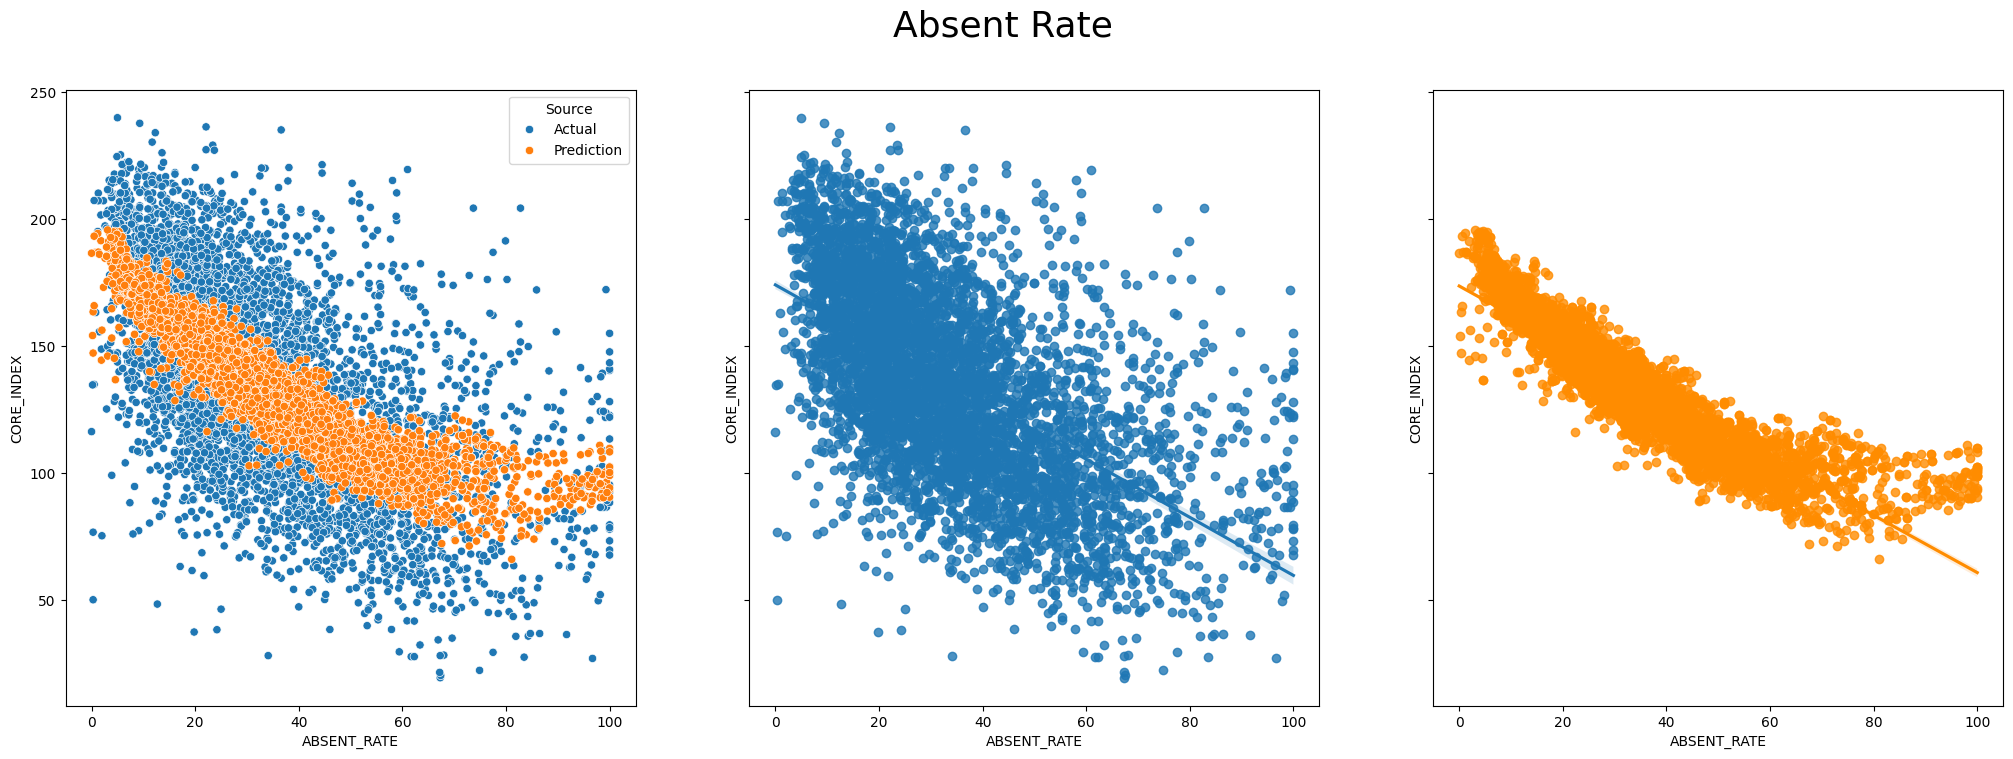

In [47]:
for feature in features:
    figure, axes = plt.subplots(1,3,  figsize=(25, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    sns.scatterplot(scatter_df, x=feature, y=outcome, hue="Source", ax=axes[0])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Actual"], x=feature, y=outcome, ax=axes[1])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Prediction"], x=feature, y=outcome, ax=axes[2], color="darkorange")
    
    plt.show()

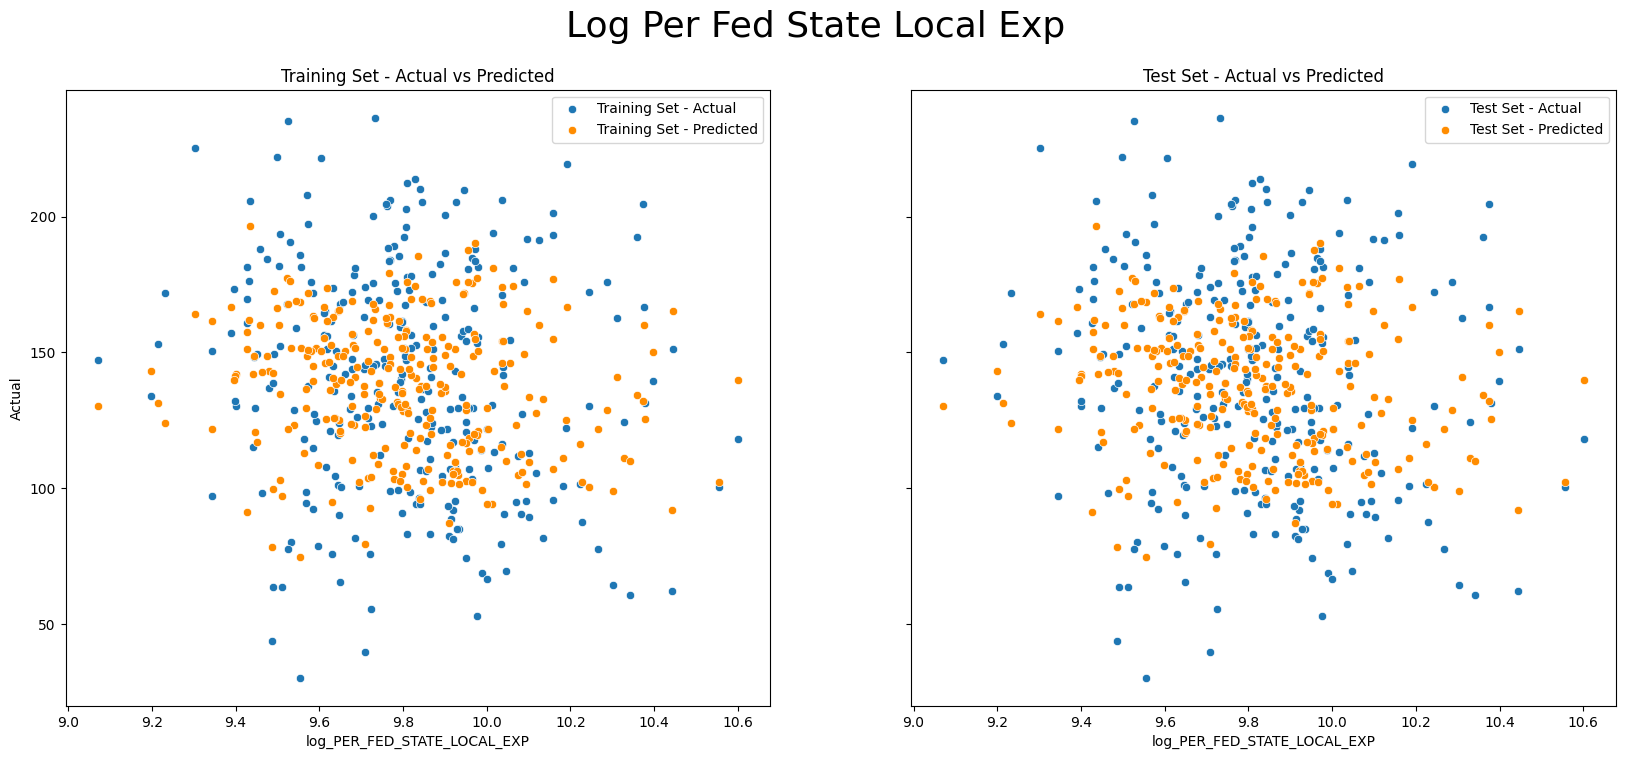

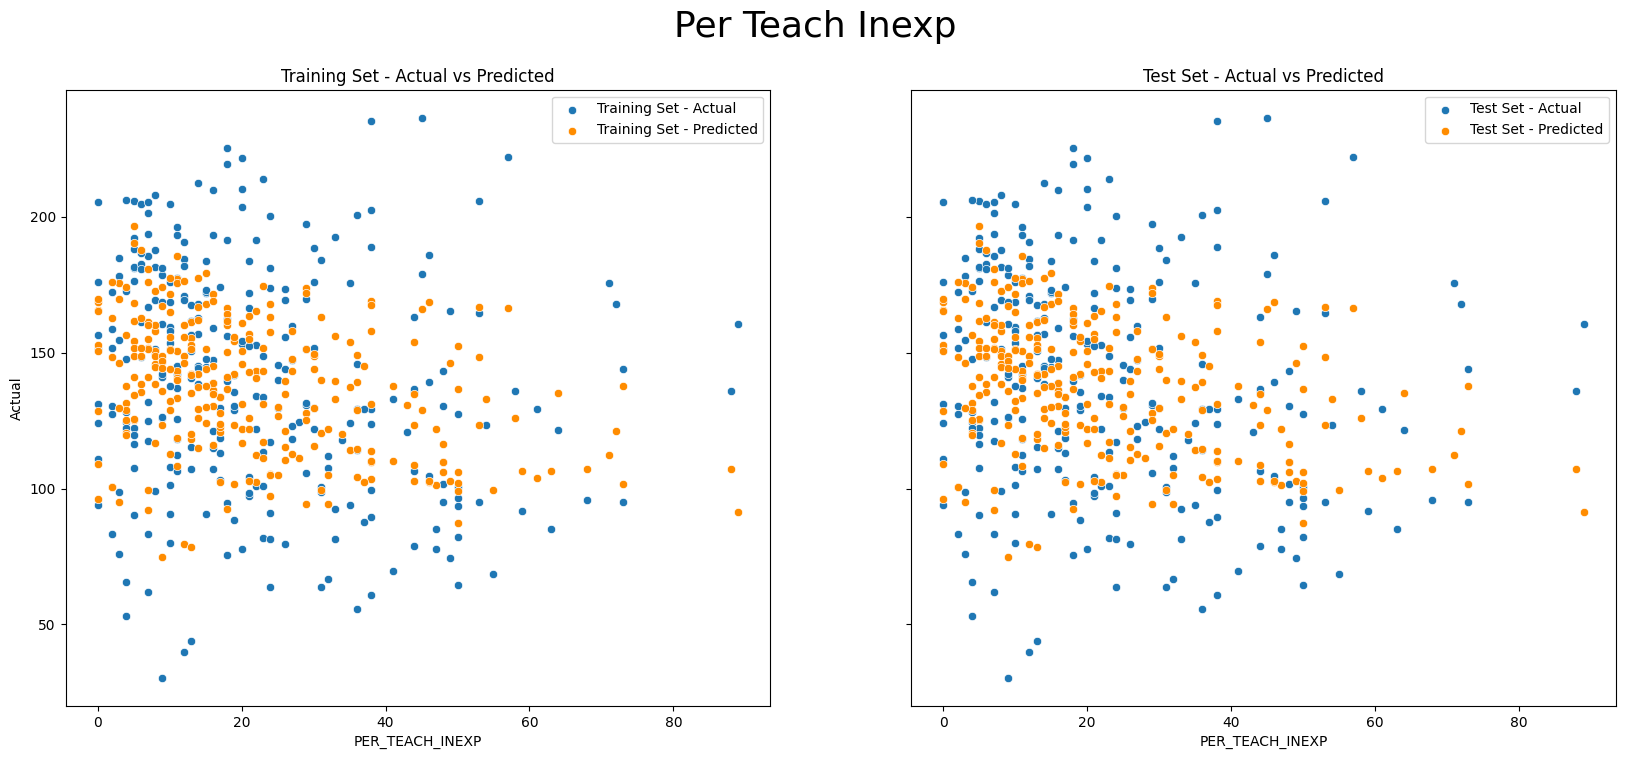

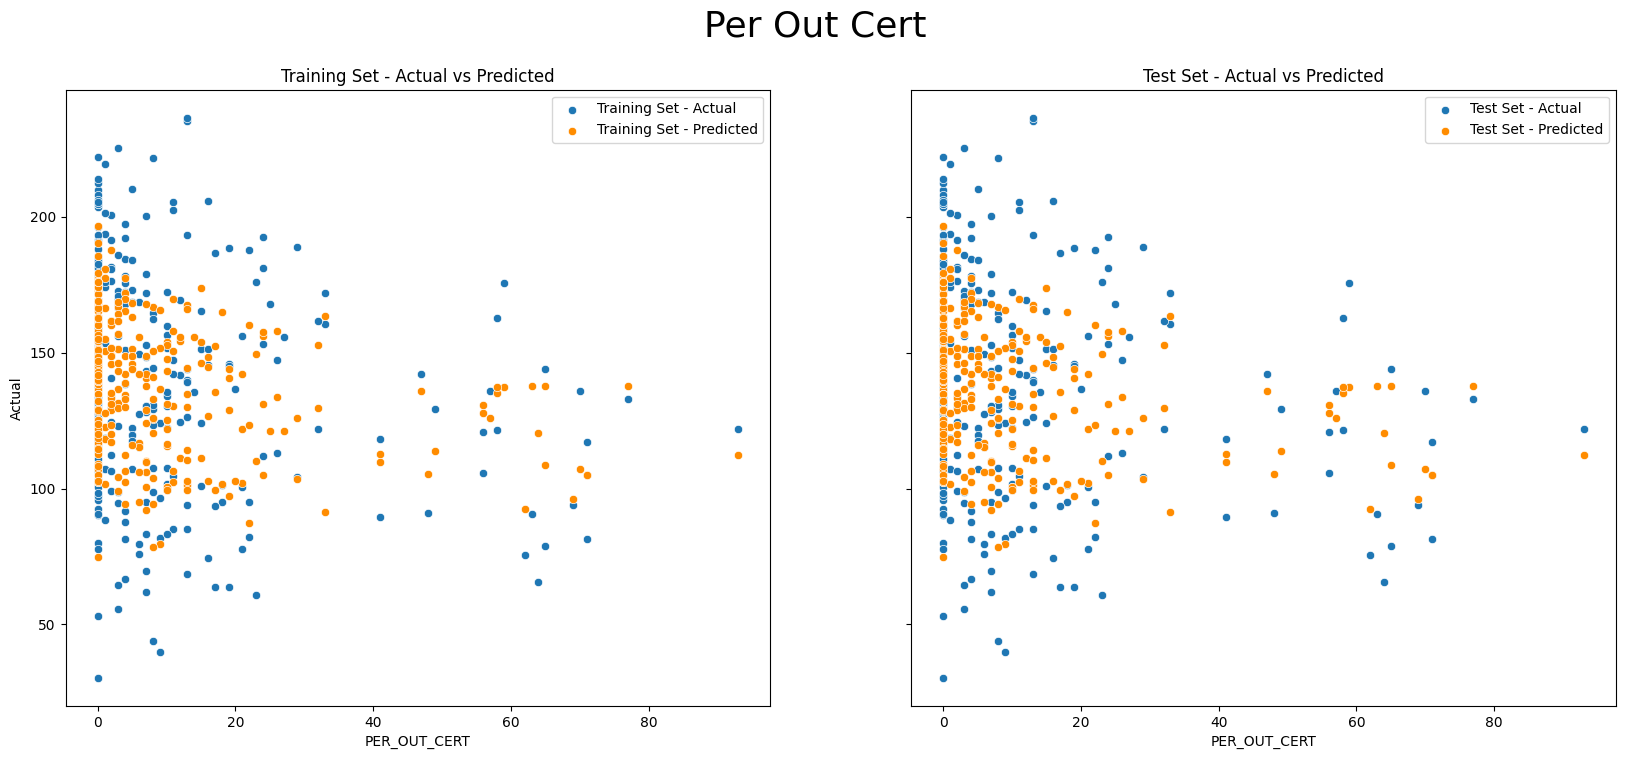

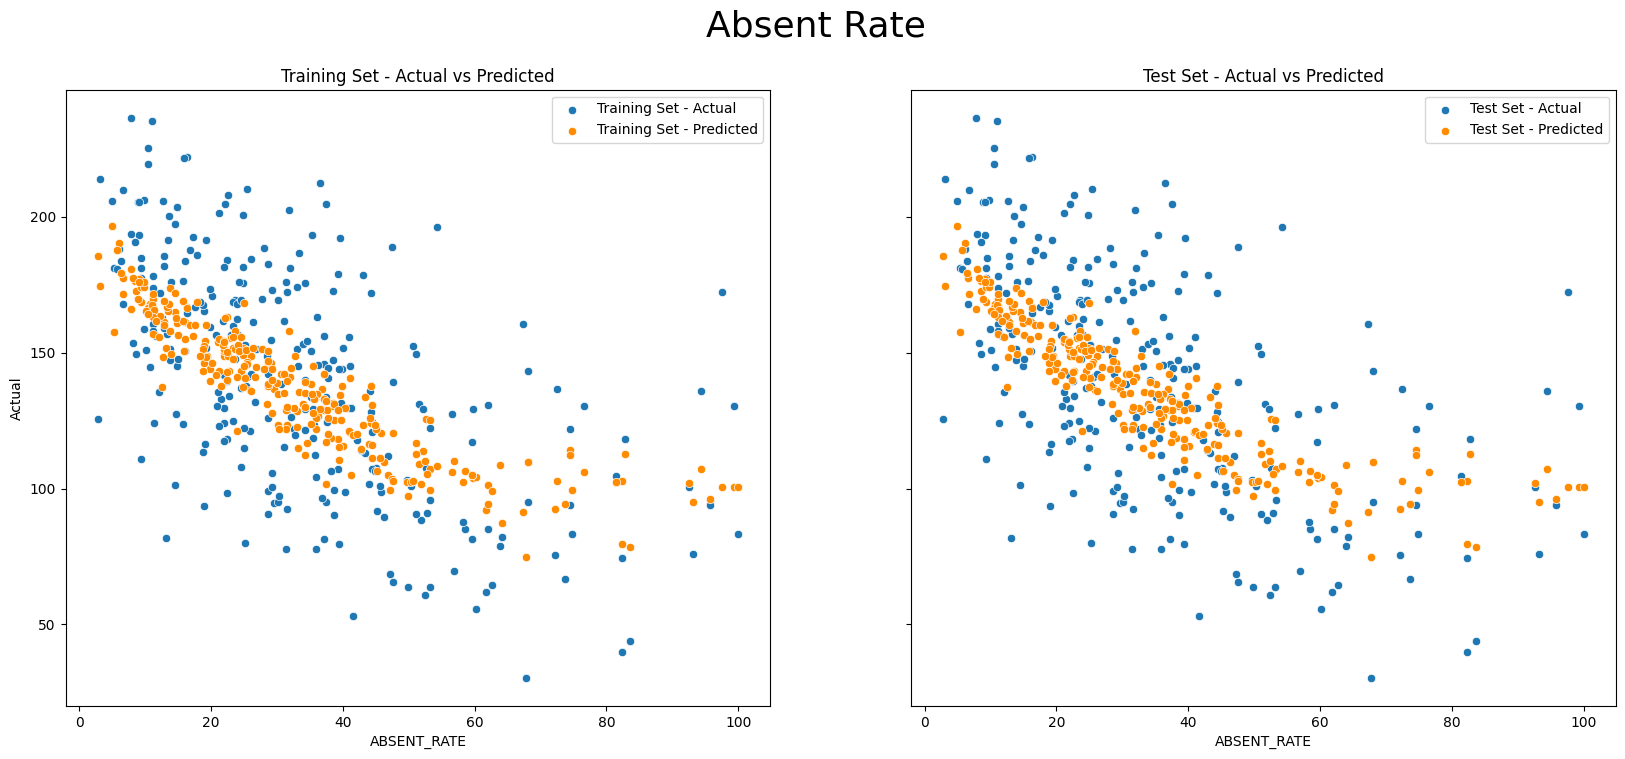

In [48]:
# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()